# Week 7 assignment

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sympy
from sympy import *
init_printing(use_unicode = True, fontsize = 16)
pi2 = pi * 2

In [3]:
import os
import sys 

if os.name == 'nt':
    path = 'C:\\Users\\Wei\\Dropbox\\Coding\\notebooks\\專案\\待處理\\Waves\\bitbucket\\github\\codes'
else:
    path = '/home/wei/Dropbox/Coding/notebooks/專案/待處理/Waves/bitbucket/github/codes'
    
sys.path.append(path)

from waves.sound import *
from waves.tools.dsp import *
from waves.tools.dsp.interpolator import *

In [4]:
from scipy import signal

# 1. 
A signal that is \Omega_NΩ 
N
​	 -bandlimited is also \Omega_MΩ 
M
​	 -bandlimited if \Omega_M \ge \Omega_NΩ 
M
​	 ≥Ω 
N
​	

# 2. 
$u(t+1/2) - u(t-1/2)$

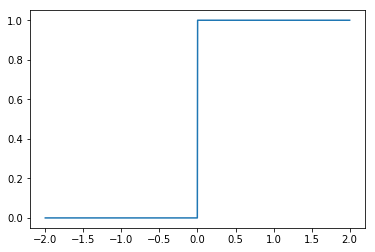

In [5]:
def u(t):
    return t>0

t = np.linspace(-2, 2, 1000)
plt.plot(t, u(t));

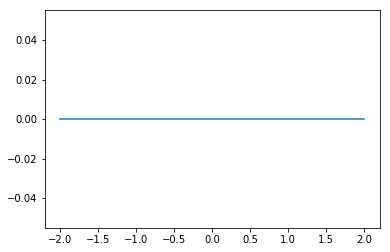

In [6]:
plt.plot(t, 1/2*u(t)-1/2*u(t));

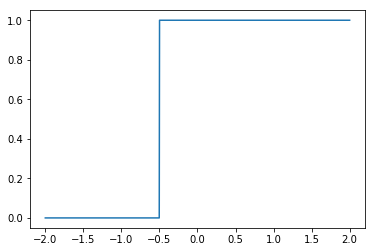

In [7]:
plt.plot(t, u(t-1/2) + u(t+1/2));

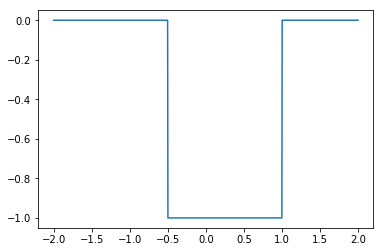

In [8]:
plt.plot(t, u(t-1) - 1*u(t+1/2));

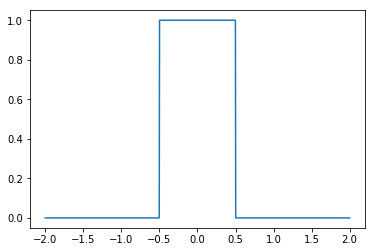

In [9]:
plt.plot(t, u(t+1/2) - 1*u(t-1/2));

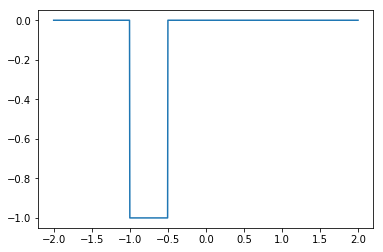

In [10]:
plt.plot(t, u(t+1/2) - 1*u(t+1));

# 3. 
1. The cutoff frequencies \Omega_{c_i}Ω   are increasing from plot (a) to plot (d).
2. There exists a T\in\mathbb{R}T∈R such that all the output signals are equal to zero for |t|>T∣t∣>T.

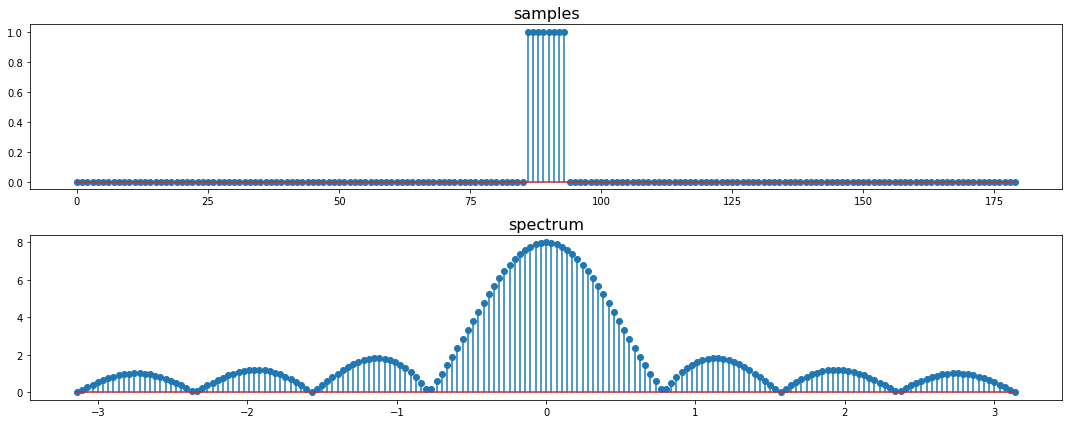

In [11]:
t = np.linspace(-10, 10, N_SAMPLES)
x = dsp.rect(t)
X = fourier.dtft(x)

# 4. 
I(jΩ)= 
4
1
​	 sinc( 
4π
Ω
​	 )

The interpolator has a triangular shape in the time domain. Select the correct expression for $I(j\Omega)I(jΩ)$, the Fourier transform of the interpolator. (Hint: a triangle can be obtained by convolving two rectangles).

$$
\begin{align}
r &= rect(t) \\
DTFT\{rect(t)\} &= \int_{-\infty}^{\infty} rect(t) e^{-j\omega t} dt \\
R(e^{j\omega})&= \int_{-\frac{1}{2}}^{\frac{1}{2}}  e^{-j\omega t} dt  \\
&=    \frac{e^{-j\omega t}}{-j\omega} |_{-\frac{1}{2}}^{\frac{1}{2}} \\
&=    sinc(\frac{\omega}{2}) \\
\end{align}
$$

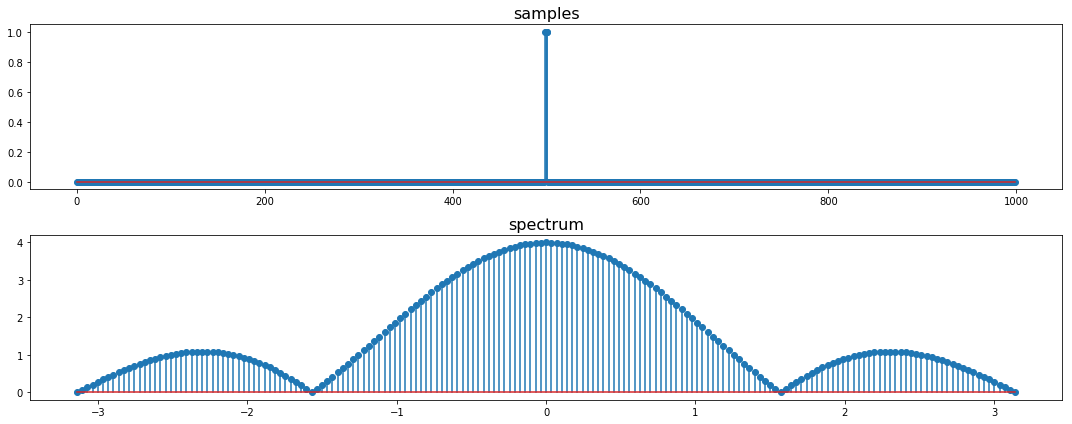

In [12]:
t = np.linspace(-100, 100, 1000)
_ = fourier.dtft(dsp.rect(t))

In [13]:
from sympy import I
w, t,  = symbols('w, t', real = True)
R = sinc(w)**2
R.expand()

In [14]:
from sympy import I
w, t,  = symbols('w, t', real = True)
R = Integral( E**(-I*w*t), (t, -1/2, 1/2))
R.subs(w, 2/np.pi).evalf()

$$
\begin{align}
I(t) &=  \begin{cases} 
            1-2|t| & |t| \leq \frac{1}{2} \\
            0 &  otherwise \\
   \end{cases} \\
I(j\Omega) &= \int_{-\infty}^{\infty} I(t)e^{-j\Omega t} dt \\
&= \int_{-\frac{1}{2}}^{\frac{1}{2}} I(t)e^{-j\Omega t} dt \\&= \int_{-\frac{1}{2}}^{\frac{1}{2}} (1-2|t|) e^{-j\Omega t} dt \\
\end{align}
$$

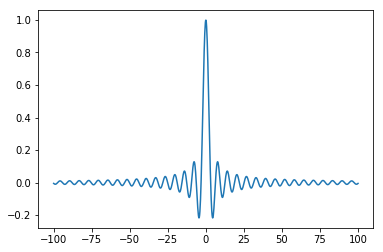

In [15]:
t = np.linspace(-100, 100, 1000)
plt.plot(t, np.sin(t)/t);

$$
∫∞−∞eiωxeiω/2−e−iω/2iωdω ==∫∞+ϵi−∞+ϵieiωxeiω/2−e−iω/2iωdω∫∞+ϵi−∞+ϵieiωxeiω/2iωdω−∫∞+ϵi−∞+ϵieiωxe−iω/2iωdω.
$$

In [16]:
t, i = symbols('t, i', real = True)
i = Piecewise([1-2*absolute(t), absolute(t)<= 1/2], [0, 1])
dtft_I = Integral(i, (t, -1/2, 1/2))
# dtft_I.evalf()
dtft_I

0.5                               
 ⌠                                
 ⎮   ⎧-2⋅│t│ + 1  for │t│ ≤ 0.5   
 ⎮   ⎨                          dt
 ⎮   ⎩    0         otherwise     
 ⌡                                
-0.5                              

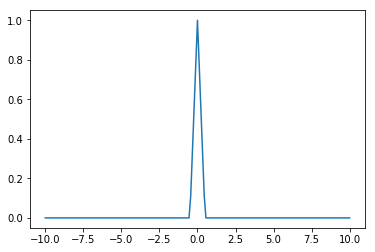

In [17]:
def i(t):
    result = 1-2*np.abs(t)
    result[np.where(np.abs(t)>1/2)] = 0
    return result

t = np.linspace(-10, 10, N_SAMPLES + 1)
plt.plot(t, i(t));

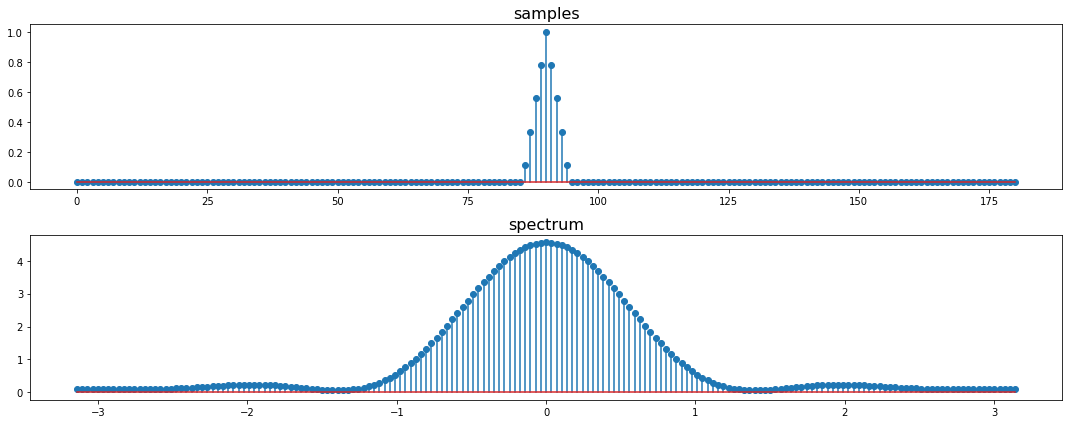

In [18]:
I = fourier.dtft(i(t))

# 5. 


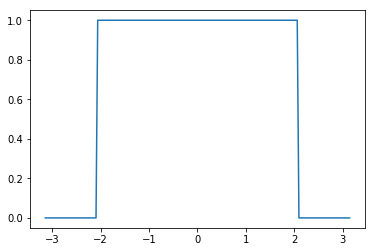

In [19]:
w = dsp.get_freq_bins()
X = np.zeros_like(w)
X[np.abs(w) <= 2/3*np.pi] = 1
plt.plot(w, X);

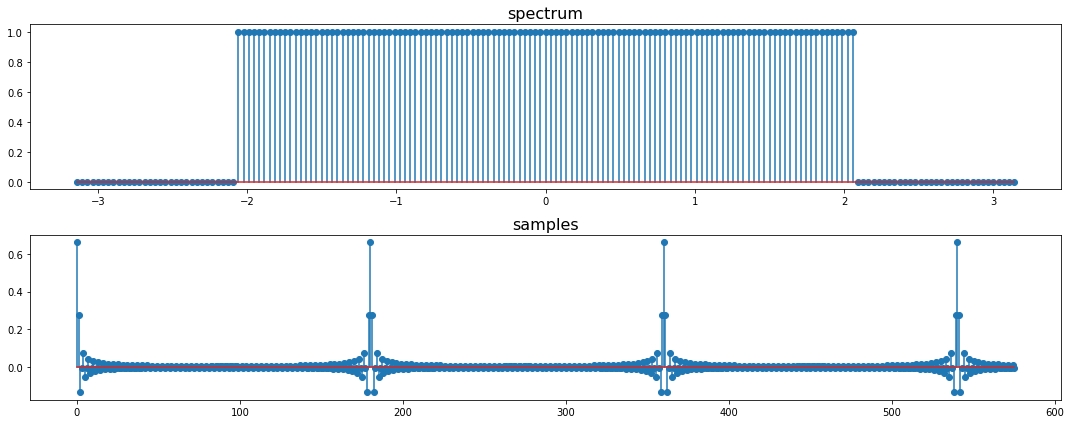

In [37]:
x = fourier.idtft(X, n_samples= N_SAMPLES * 3.2)

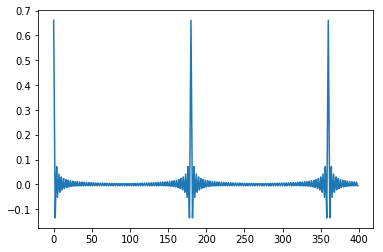

In [38]:
plt.plot(x[:400]);

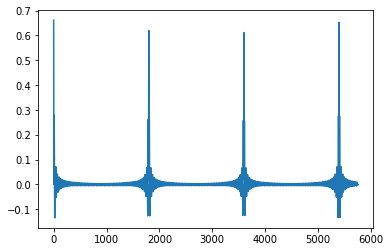

In [22]:
Ts = 1/10
t = np.linspace(0, len(x) * Ts, len(x) * 10)

def I(t, n, Ts):
    y = np.zeros_like(t)
    abs_t = np.abs(t / Ts - n)
    idx = abs_t <= 1/2
    y[idx] = 1 - 2* abs_t[idx]
    return y 

xts = np.zeros_like(t)

for n in range(len(x)):
    xts = xts + x[n] * I(t, n, Ts)
    
plt.plot(xts);

In [23]:
len(x)

In [24]:
len(xts)

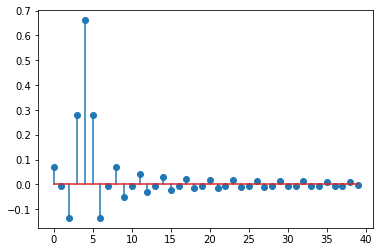

In [40]:
plt.stem(x[-40:]);

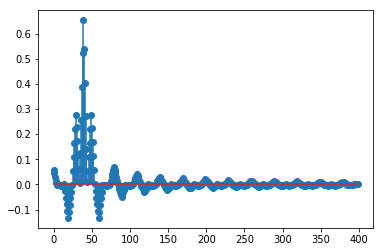

In [41]:
plt.stem(xts[-400:]);

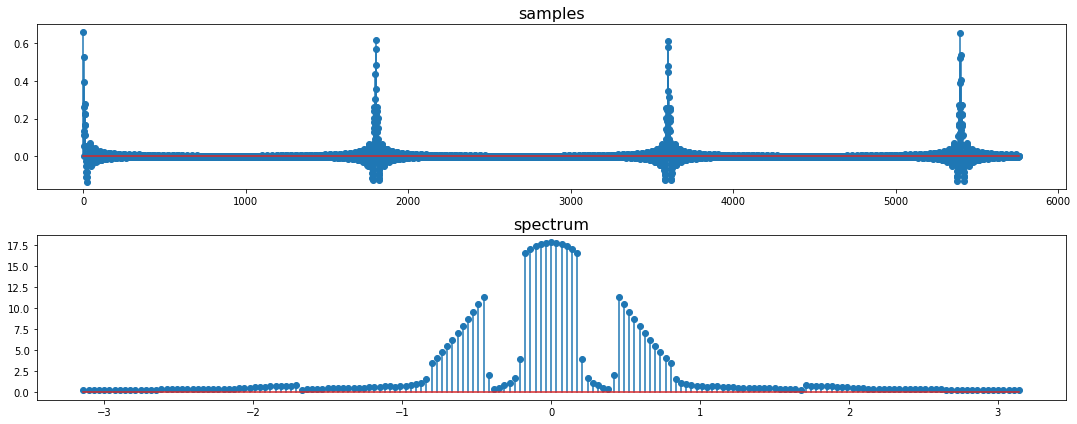

In [25]:
XTS = fourier.dtft(xts)

# 6. 
The interpolated signal has finite length in time because of the limited support of the interpolating function I(t)I(t).
 
The periodic copies of X(e^{j \pi \Omega/\Omega_N})X(e 
jπΩ/Ω 
N  ) outside of [-\Omega_N,\Omega_N][−Ω 
N  ,Ω 
N  ] are not eliminated by the interpolation filter, since it is not an ideal lowpass.


The spectrum between [-\Omega_N,\Omega_N][−Ω 
N  ,Ω 
N  ] (the baseband) is distorted by the non-flat response of the interpolating function over the baseband.

# 7. 

The sampling theorem implies that the space of bandlimited functions is a Hilbert Space.

 
The sampling of a bandlimited signal x(t)x(t) (with maximum frequency F_NF 
N  ) with a sampling frequency F_S \ge 2 \cdot F_NF 
S  ≥2⋅F 
N 	  will result in no information loss.

# 8. 
No. The signal is time-limited, so is not bandlimited. There will always be a certain amount of aliasing in the sampled version.

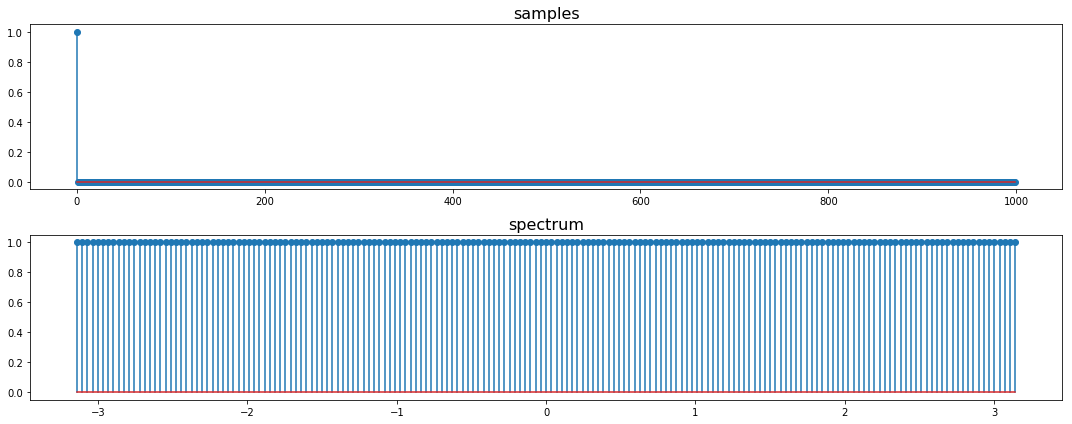

In [26]:
t = np.linspace(0, 10, 1000)
x = np.zeros_like(t)
x[:1] = 1
_ = fourier.dtft(x)

# 9. 
Sound A

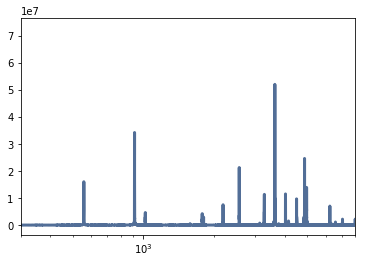

In [27]:
# the original sound.

wf = WaveFile('tc.wav')
wf.channels[0].make_spectrum().plot()
plt.xlim((300, 8000));
wf.framerate

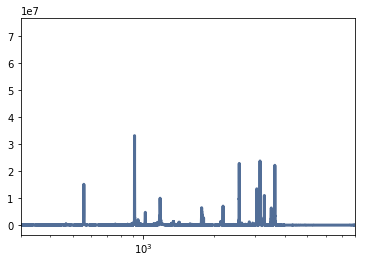

In [28]:
# Sound A.

wf = WaveFile('ta.wav')
wf.channels[0].make_spectrum().plot()
plt.xlim((300, 8000));
wf.framerate

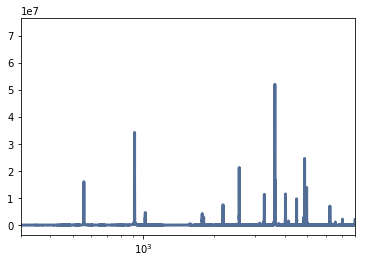

In [29]:
# Sound B.

wf = WaveFile('tb.wav')
wf.channels[0].make_spectrum().plot()
plt.xlim((300, 8000));
wf.framerate

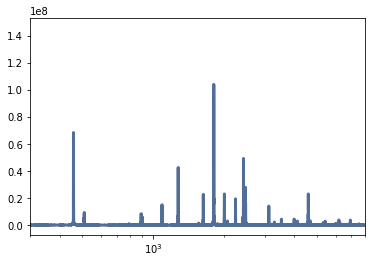

In [30]:
# Sound C.

wf = WaveFile('td.wav')
wf.channels[0].make_spectrum().plot()
plt.xlim((300, 8000));
wf.framerate

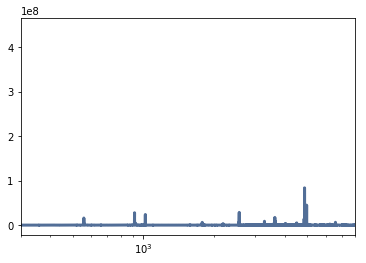

In [31]:
# Sound D.

wf = WaveFile('te.wav')
wf.channels[0].make_spectrum().plot()
plt.xlim((300, 8000));
wf.framerate

# 10. 
T 
s
​	 =π/Ω 
0
​	

# 11. 
2 KHz

In [54]:
w.framerate

In [46]:
s = thinkdsp.SinSignal(freq=10000)
w = s.make_wave(framerate=8000)
x = w.ys
t = w.ts

Fs = 8000
Ts = 1/Fs
# t = np.linspace(0, len(x) * Ts, len(x) * 10)

def I(t, n, Ts):
    y = np.zeros_like(t)
    abs_t = np.abs(t / Ts - n)
    idx = abs_t <= 1/2
    y[idx] = 1 - 2* abs_t[idx]
    return y 

x_interpolated = np.zeros_like(t)

for n in range(len(x)):
    x_interpolated = x_interpolated + x[n] * I(t, n, Ts)
    
# plt.plot(xts);

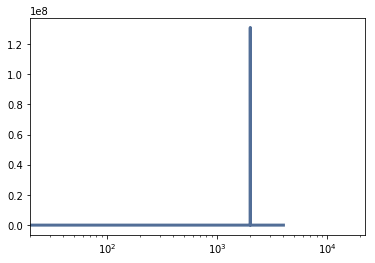

In [57]:
tb = Channel(x, framerate = w.framerate).make_spectrum()
tb.plot()

In [58]:
tb.rank_by_amps()

(array([2000.,  400., 3600., ..., 1389., 1391., 2037.]),
 array([1.31068000e+08, 3.72546793e-09, 3.72546793e-09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]))

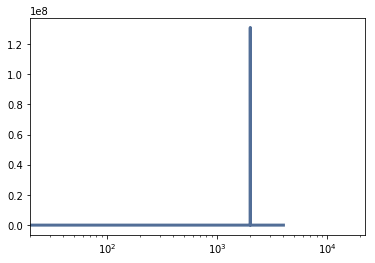

In [60]:
tb = Channel(x_interpolated, framerate = Fs).make_spectrum()
tb.plot()

In [61]:
tb.rank_by_amps()

(array([2000., 2992., 1008., ...,  498., 1120., 2880.]),
 array([1.31067449e+08, 2.62028635e+02, 2.62028635e+02, ...,
        1.30469769e-01, 1.20636279e-01, 1.20636279e-01]))

# 12. 


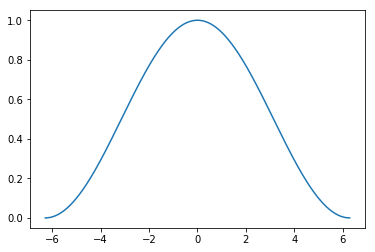

In [62]:
Omega_N = np.pi
Omega = np.linspace(-2*Omega_N, 2*Omega_N, 1000)
X_c = np.cos(np.pi/4*Omega/Omega_N)**2
plt.plot(Omega, X_c);

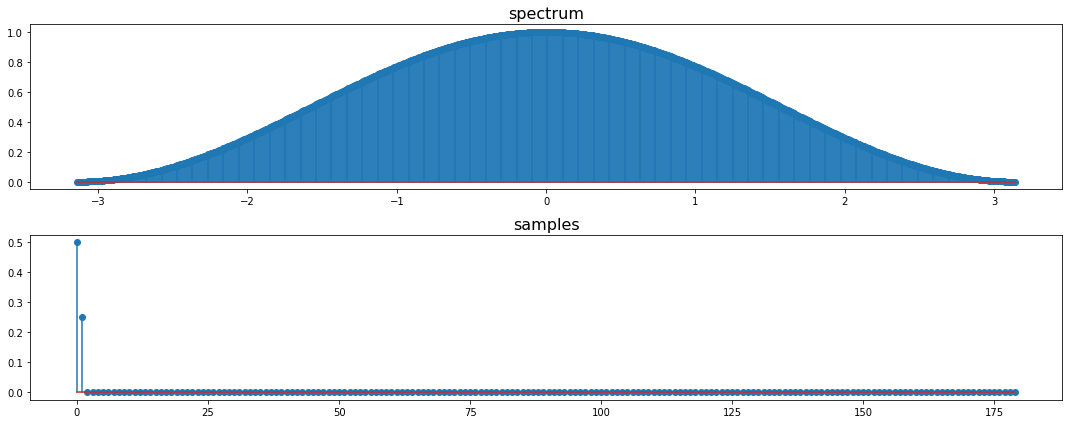

In [64]:
x_t = fourier.idtft(X_c)

/home/wei/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


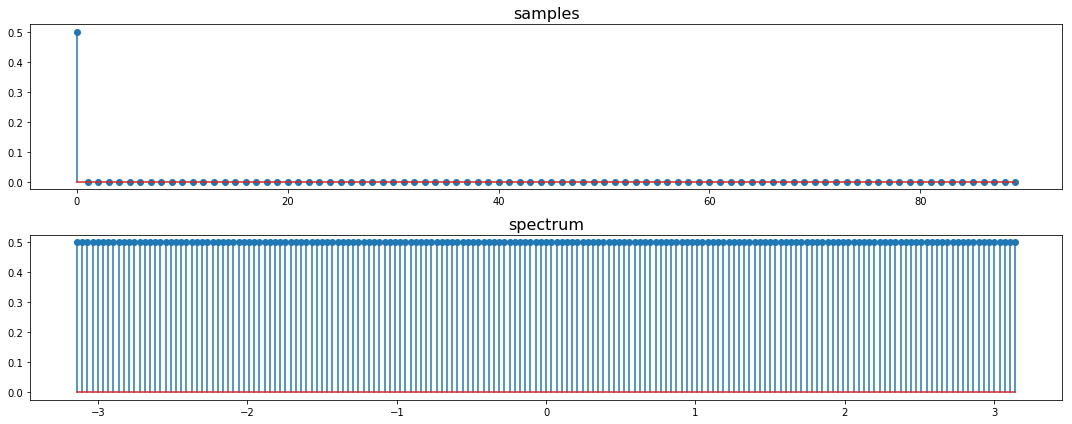

In [65]:
sampled_x_t = x_t[::2]
X_c_hat = fourier.dtft(sampled_x_t)

# 13. 
20

In [105]:
def count_crossing(x):
    signs = np.sign(x)
    signs_mul = signs[1:] * signs[:-1]
    return np.sum(signs_mul < 0)

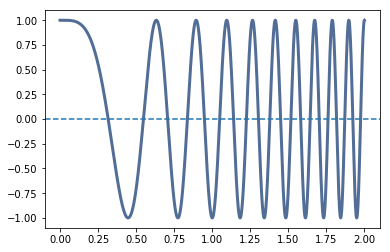

In [106]:
s = thinkdsp.Chirp(start=0, end = 10)
w = s.make_wave(duration=2, framerate = 8000)
w.plot()
x = w.ys
plt.axhline(0, linestyle = '--');

In [107]:
count_crossing(x)

20

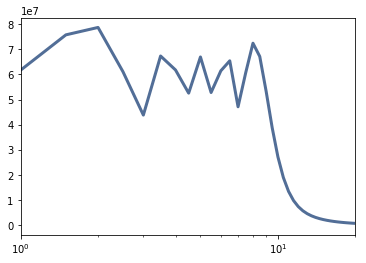

In [108]:
ch = Channel(x, framerate= Fs)
tb = ch.make_spectrum()
tb.plot()
plt.xlim((1, 20));

In [125]:
f0, f1, t, dur = symbols('f0, f1, t, dur', real = True)
x =  pi*2*f0*t + (f1-f0)/dur*pi*t**2
x.collect(t)

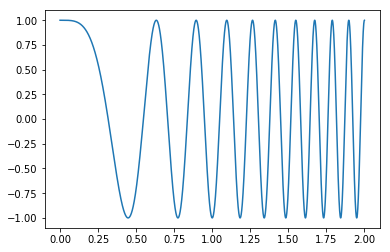

In [145]:
def phase(f0, f1, Fs, duration):
    t = np.linspace(0, duration, duration * Fs)
    return t, PI2*f0*t + ((f1-f0)*np.pi/duration)*t**2

Fs = 8000

f0 = 0
f1 = 10
duration = 2

# t1 = duration 
# alpha = (f1-f0)/t1

# x = np.cos(PI2*f0*t + alpha*np.pi*t**2)

t, phases = phase(f0, f1, Fs, duration)
x = np.cos(phases)

plt.plot(t, x);

In [133]:
count_crossing(x)

20

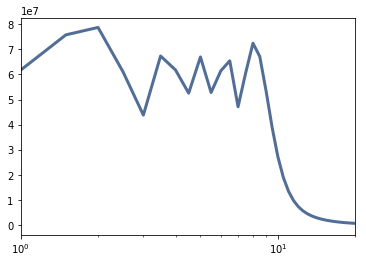

In [132]:
ch = Channel(x, framerate= Fs)
tb = ch.make_spectrum()
tb.plot()
plt.xlim((1, 20));

# 14. 
The instantaneous frequency of the chirp is linearly increasing with time.


If the runtime for the chirp generation is not limited, we cannot set a sampling frequency such that there will be no aliasing.

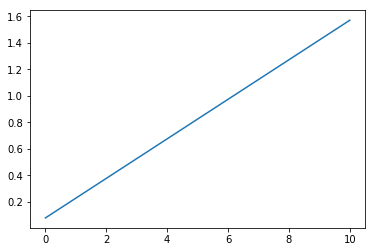

In [141]:
t, phases = phase(100, 2000, Fs, 10)
plt.plot(t[1:], np.diff(phases));

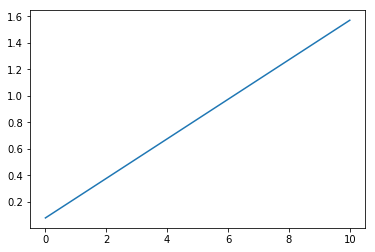

In [144]:
t, phases = phase(100, 2000, Fs, 10)
plt.plot(t, np.gradient(phases));

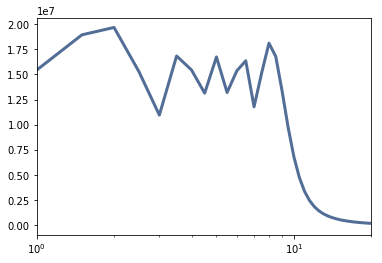

In [146]:
x_slow_sampled = x[::4]
ch = Channel(x_slow_sampled, framerate= Fs/4)
tb = ch.make_spectrum()
tb.plot()
plt.xlim((1, 20));

# 15. 
h[n]=δ[n]+βδ[n−1]

$$
\begin{align}
Y[n] = X[n] + \beta X[n-1] \\
\end{align}
$$

- X[n] has autocorrelation :  

$$
\begin{align}
r_x[k] &= E[x[n] \times x[n+k]]  \\
&= \sigma^2 \alpha^{|k|}, \space |\alpha| \leq 1  \\
\end{align}
$$

# 16. 


$$
\begin{align}
H(z) &= 1+\beta z^{-1} \\
& = 1+\beta e^{-j\omega}  \\
P_X(e^{j\omega}) &= DTFT\{r_x[n]\} \\ 
&= DTFT\{\sigma^2 \alpha^{|n|} \} \\
&= \sum_{n=-N}^{N} \sigma^2 \alpha^{|n|} e^{-j\omega n} \} \\
&= \sigma^2 \sum_{n=-N}^{N}  \alpha^{|n|} e^{-j\omega n} \} \\
P_Y(e^{j\omega}) &= |H(z)|^2 P_X(e^{j\omega})\\ 
&= |1+\beta e^{-j\omega} |^2 \sigma^2 \sum_{n=-N}^{N}  \alpha^{|n|} e^{-j\omega n} \}
\end{align}
$$

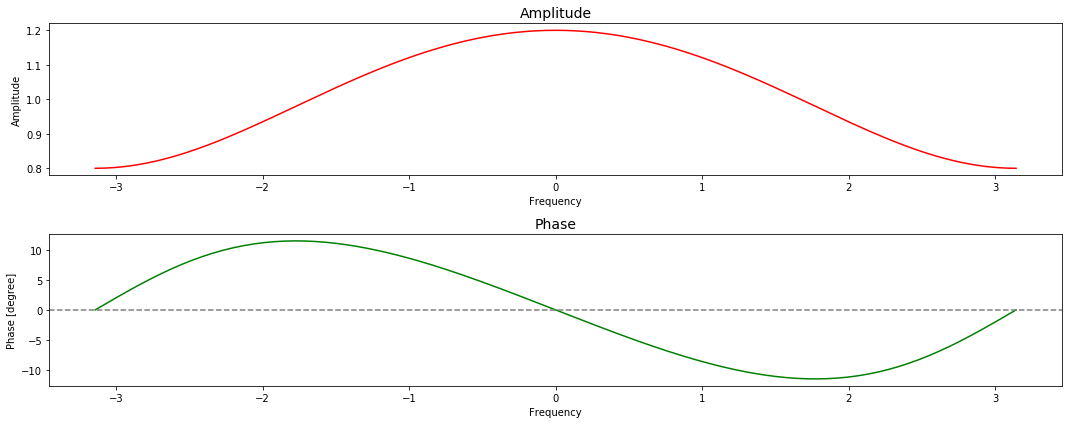

In [150]:
beta = 0.2
_ = filtering.get_H_from_polynomials([[1, beta]], plot=True)

# 17. 
The samples of Y[n]Y[n] must be uncorrelated.  
The power spectrum P_Y(e^{j\omega})P 
Y  (e jω  ) must be constant.

# 18.
14

In [151]:
SNR_dB = 80
R = 80 / 6
R

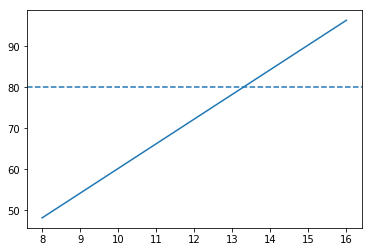

In [152]:
R = np.arange(8, 17)
SNR_dB = 10*np.log10(2**(2*R))
plt.plot(R, SNR_dB)
plt.axhline(80, ls = '--');

# 19. 
$  \frac{2^{2R}}{ 4 } $

$$
\begin{align}
P_x(e^{j\omega}) &= \sigma^2_x \\
\Delta &= \frac{(2 \times 2\sqrt{3}\sigma_x)}{2^R}  \\
\sigma_e^2 &= \frac{\Delta^2}{12}  \\
&= \frac{\frac{(2 \times 2\sqrt{3}\sigma_x)^2}{2^{2R}}}{12}  \\
&= \frac{\frac{48\sigma_x^2}{2^{2R}}}{12}  \\
&=  \frac{48\sigma_x^2}{12 \times 2^{2R}} \\
SNR &= \frac{\sigma_x^2}{\sigma_e^2} \\
&=  \frac{\sigma_x^2}{\frac{48\sigma_x^2}{12 \times 2^{2R}}} \\
&=  \frac{2^{2R}}{ 4 } \\
&= 2^{2R-2} \\
\end{align}
$$